<a href="https://colab.research.google.com/github/EmmanuelRamos143/AA/blob/main/Tarea5/Tarea5NoSupervisado8pts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Clúster usando Fuzzy C-Means

In [1]:
import warnings
warnings.filterwarnings('ignore')
import sys

sys.path.append('/content/HeartAttack.py')
from HeartAttack import *

heart_df = HeartAttackHelper.obtainHearthDF()

In [9]:
!pip install pip install fuzzy-c-means
!pip install ipython-autotime
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 29.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=dd9390de3d0c4aa3925a3f9ecc2fd6b11ceae91f11560372238e452b39d319e4
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy
time: 12 s (started: 2023-02-27 23:50:00 +00:00)


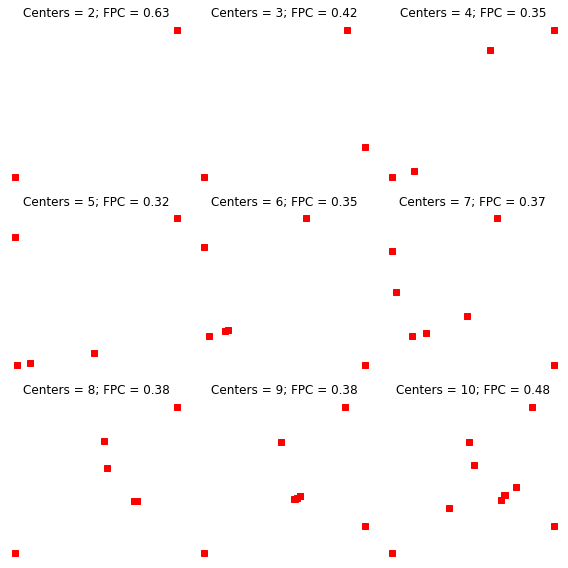

time: 566 ms (started: 2023-02-27 23:50:16 +00:00)


In [10]:

import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import skfuzzy as fuzz
scaler = MinMaxScaler()
scaled = scaler.fit_transform(heart_df)

# Set up the loop and plot
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
alldata = scaled
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    fpcs.append(fpc)

    
    cluster_membership = np.argmax(u, axis=0)

  
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()

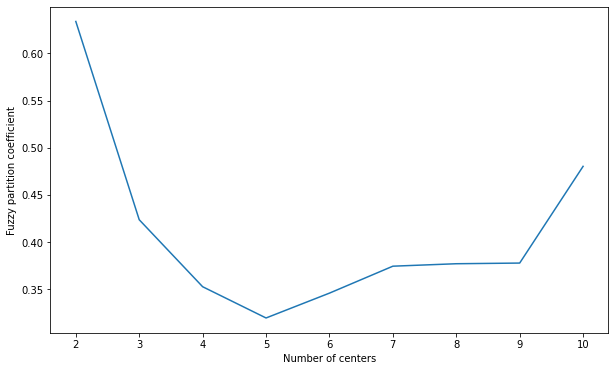

time: 569 ms (started: 2023-02-27 23:51:26 +00:00)


In [12]:
fig2, ax2 = plt.subplots()
fig2.set_figheight(6)
fig2.set_figwidth(10)
ax2.plot(np.r_[2:11], fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")
plt.savefig('elbow.pdf')  

**Observaciones**: Se puede ver de manera muy abstracta las iteraciones realizadas por el algortimo de _fuzzy c-means_ y obtenemos el valor que necesitamos el cual es **FCP (Coeficiente de particiones de fuzzy)** el cual nos indica que el mejor cluster para nuestros datos es de **n=2**, se puede ver con el metodo de codo como hubo un subito decremento del numero 2 al 3, lo cual indica un muy claro valor de nuestro n.  